In [1]:
import torch
from torch import nn

In [2]:
net = nn.Sequential(
  nn.LazyLinear(8),
  nn.ReLU(),
  nn.LazyLinear(1)
)

X = torch.rand(size=(2, 4))
net(X).shape

torch.Size([2, 1])

In [3]:
net

Sequential(
  (0): Linear(in_features=4, out_features=8, bias=True)
  (1): ReLU()
  (2): Linear(in_features=8, out_features=1, bias=True)
)

In [4]:
net[2].state_dict()

OrderedDict([('weight',
              tensor([[ 0.2534,  0.0919, -0.3019, -0.2080, -0.0903,  0.1282,  0.0925,  0.1505]])),
             ('bias', tensor([0.2239]))])

In [5]:
net[2].bias

Parameter containing:
tensor([0.2239], requires_grad=True)

In [6]:
type(net[2].bias)

torch.nn.parameter.Parameter

In [7]:
net[2].bias.data

tensor([0.2239])

In [8]:
net[2].weight.grad == None

True

In [9]:
[(name, param.shape) for name, param in net.named_parameters()]

[('0.weight', torch.Size([8, 4])),
 ('0.bias', torch.Size([8])),
 ('2.weight', torch.Size([1, 8])),
 ('2.bias', torch.Size([1]))]

In [10]:
shared = nn.LazyLinear(8)
net = nn.Sequential(
  nn.LazyLinear(8),
  nn.ReLU(),
  shared,
  nn.ReLU(),
  shared,
  nn.ReLU(),
  nn.LazyLinear(1)
)

In [11]:
net(X)

tensor([[0.0963],
        [0.0983]], grad_fn=<AddmmBackward0>)

In [12]:
net

Sequential(
  (0): Linear(in_features=4, out_features=8, bias=True)
  (1): ReLU()
  (2): Linear(in_features=8, out_features=8, bias=True)
  (3): ReLU()
  (4): Linear(in_features=8, out_features=8, bias=True)
  (5): ReLU()
  (6): Linear(in_features=8, out_features=1, bias=True)
)

In [13]:
print(net[2].weight.data[0] == net[4].weight.data[0])

tensor([True, True, True, True, True, True, True, True])


In [14]:
net[2].weight.data[0, 0] = 100
print(net[2].weight.data[0] == net[4].weight.data[0])

tensor([True, True, True, True, True, True, True, True])


### Exercises

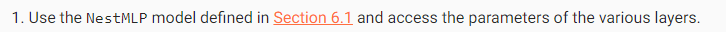

In [15]:
class NestMLP(nn.Module):
    def __init__(self):
        super().__init__()
        self.net = nn.Sequential(nn.LazyLinear(64), nn.ReLU(),
                                 nn.LazyLinear(32), nn.ReLU())
        self.linear = nn.LazyLinear(16)

    def forward(self, X):
        return self.linear(self.net(X))

In [16]:
model = NestMLP()

In [17]:
model.net

Sequential(
  (0): LazyLinear(in_features=0, out_features=64, bias=True)
  (1): ReLU()
  (2): LazyLinear(in_features=0, out_features=32, bias=True)
  (3): ReLU()
)

In [18]:
model.net[0].state_dict()

OrderedDict([('weight', <UninitializedParameter>),
             ('bias', <UninitializedParameter>)])

In [19]:
X = torch.randn(1, 20)
model(X)

tensor([[ 0.2743, -0.0275,  0.0004, -0.0212,  0.0589, -0.1322, -0.0003, -0.1229,
          0.1295, -0.0082, -0.2574,  0.0024, -0.0399,  0.1686,  0.1730, -0.1126]],
       grad_fn=<AddmmBackward0>)

In [20]:
for name, param in model.named_parameters():
  print(f"{name}: {param.data}]")

net.0.weight: tensor([[ 0.0203, -0.2099,  0.1668,  ...,  0.1482,  0.0884,  0.0416],
        [-0.1818,  0.1943, -0.0342,  ...,  0.0710,  0.0981,  0.1423],
        [ 0.1117, -0.1039, -0.1222,  ..., -0.0161,  0.0365, -0.2038],
        ...,
        [ 0.1204,  0.0709, -0.0653,  ..., -0.0006,  0.0129, -0.1193],
        [ 0.1561, -0.0423, -0.1485,  ..., -0.1673,  0.0414,  0.1453],
        [-0.1442, -0.1049,  0.2202,  ...,  0.1314,  0.0456, -0.0851]])]
net.0.bias: tensor([-0.1061, -0.0051,  0.1061,  0.1453,  0.1895,  0.2148,  0.1054,  0.1735,
         0.2154, -0.1740, -0.0449, -0.1673,  0.2124, -0.2101,  0.0431,  0.2076,
        -0.1034,  0.1355,  0.0109, -0.0361,  0.0436,  0.1191, -0.0075,  0.1885,
        -0.0398, -0.1600, -0.1124,  0.1703,  0.0392,  0.1666, -0.1536, -0.0991,
        -0.1492,  0.0098,  0.0046, -0.0191,  0.0231, -0.0030, -0.0616, -0.0400,
        -0.2205,  0.0643,  0.1238, -0.1649,  0.0568, -0.1756,  0.1456, -0.1573,
         0.1675,  0.0039,  0.0752, -0.1137, -0.0993,  0.005

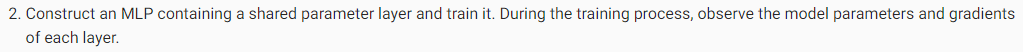

In [21]:
from d2l import torch as d2l

In [22]:
class SharedMLP(d2l.Module):
  def __init__(self, num_outputs, lr):
    super().__init__()
    self.num_outputs = num_outputs
    self.lr = lr    
    self.shared_layer = nn.LazyLinear(10)
    
    self.net = nn.Sequential(
      self.shared_layer,
      nn.ReLU(),
      self.shared_layer,
      nn.ReLU(),
      nn.LazyLinear(num_outputs)
    )
    
  def loss(self, y_hat, y):
    fn = nn.MSELoss()
    return fn(y_hat, y)

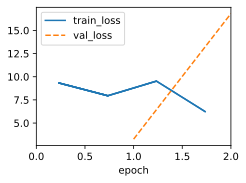

In [23]:
model = SharedMLP(num_outputs=1, lr=0.1)
data = d2l.SyntheticRegressionData(w=torch.randn(10), b=torch.randn(1))
trainer = d2l.Trainer(max_epochs=2)
trainer.fit(model, data)

In [24]:
model.net

Sequential(
  (0): Linear(in_features=10, out_features=10, bias=True)
  (1): ReLU()
  (2): Linear(in_features=10, out_features=10, bias=True)
  (3): ReLU()
  (4): Linear(in_features=10, out_features=1, bias=True)
)

In [25]:
next(model.net[0].parameters()).data == next(model.net[2].parameters()).data

tensor([[True, True, True, True, True, True, True, True, True, True],
        [True, True, True, True, True, True, True, True, True, True],
        [True, True, True, True, True, True, True, True, True, True],
        [True, True, True, True, True, True, True, True, True, True],
        [True, True, True, True, True, True, True, True, True, True],
        [True, True, True, True, True, True, True, True, True, True],
        [True, True, True, True, True, True, True, True, True, True],
        [True, True, True, True, True, True, True, True, True, True],
        [True, True, True, True, True, True, True, True, True, True],
        [True, True, True, True, True, True, True, True, True, True]])

In [26]:
next(model.net[0].parameters()).grad == next(model.net[2].parameters()).grad

tensor([[True, True, True, True, True, True, True, True, True, True],
        [True, True, True, True, True, True, True, True, True, True],
        [True, True, True, True, True, True, True, True, True, True],
        [True, True, True, True, True, True, True, True, True, True],
        [True, True, True, True, True, True, True, True, True, True],
        [True, True, True, True, True, True, True, True, True, True],
        [True, True, True, True, True, True, True, True, True, True],
        [True, True, True, True, True, True, True, True, True, True],
        [True, True, True, True, True, True, True, True, True, True],
        [True, True, True, True, True, True, True, True, True, True]])